# Movie reviews

This notebook takes you though a complete iteration of Machine Learning Assignment 1 - Movie reviews. The assignment details (including links to download the data) can be found [here](https://docs.google.com/document/d/1WGYw99e5q6j5V0Zrf2HveagU6URt_kVvdR8B9HYQ99E/edit?usp=sharing). 

In [4]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [5]:
# help(BinaryClassificationPerformance)

# Function for feature building and extraction on natural language data

In [6]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
#     print("movie_data is:", type(movie_data))
#     print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
#     print("the data types for each of the columns in movie_data:")
#     print(movie_data.dtypes, "\n")
#     print("the first 10 rows in movie_data:")
#     print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape) 

    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    
    # CountVectorizer, modelled on HashingVectorizer above
    from sklearn.feature_extraction.text import CountVectorizer
    if (not test): # fit_transform()
        cv = CountVectorizer(ngram_range=(1, 2))
        X_cv = cv.fit_transform(movie_data.review)
        fitted_transformations.append(cv)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    else: # transform() 
        X_cv = fitted_transformations[2].transform(movie_data.review)
        print("Shape of CountVectorizer X:")
        print(X_cv.shape)
    
    #TfidfTransformer for CountVectorizer, modelled on TfidfTransformer for HashingVectorizer above    
    if (not test):
        transformer_cv = TfidfTransformer()
        X_tfidf = transformer_cv.fit_transform(X_cv)
        fitted_transformations.append(transformer_cv)
    else:
        X_tfidf = fitted_transformations[3].transform(X_cv) 

        
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[4].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

# Create training and test sets from function

In [7]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_train.tsv', my_random_seed=13)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Shape of CountVectorizer X:
(25000, 1513832)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5          89           5
6         112           9
7         132           9
8         163           7
9          43           5
Size of combined bag of words and new quantitative variables matrix:
(25000, 1513834)
(25000, 1513834)
Shape of X_train and X_test:
(20000, 1513834)
(5000, 1513834)
Shape of y_train and y_test:
(20000,)
(5000,)
Shape of X_raw_train and X_raw_test:
(20000, 5)
(5000, 5)
SUCCESS!
Number of fits stored in `fitted_transformations` list: 
5


# Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X_train, y_train)

# ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
# ols_performance_train.compute_measures()
# print(ols_performance_train.performance_measures)

### MODEL: SVM, linear

In [8]:
from sklearn import linear_model

svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print(svm_performance_train.performance_measures)

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9996, 'FP': 2, 'FN': 0, 'Accuracy': 0.9999, 'Precision': 0.9998000799680128, 'Recall': 1.0, 'desc': 'svm_train'}


## MODEL: svm.SVC

In [ ]:
# from sklearn import svm

# svm_original = svm.SVC()
# svm_original.fit(X_train, y_train)

# svm_c1 = svm.SVC(C=.01)
# svm_c1.fit(X_train, y_train)

# svm_c2 = svm.SVC(C=.1)
# svm_c2.fit(X_train, y_train)

# svm_c3 = svm.SVC(C=2)
# svm_c3.fit(X_train, y_train)

# svm_c4 = svm.SVC(C=4)
# svm_c4.fit(X_train, y_train)

# svm_performance_train_original = BinaryClassificationPerformance(svm_original.predict(X_train), y_train, 'svm_train_original')
# svm_performance_train_original.compute_measures()
# print(svm_performance_train_original.performance_measures)

# svm_performance_train_c1 = BinaryClassificationPerformance(svm_c1.predict(X_train), y_train, 'svm_train_c1')
# svm_performance_train_c1.compute_measures()
# print(svm_performance_train_c1.performance_measures)

# svm_performance_train_c2 = BinaryClassificationPerformance(svm_c2.predict(X_train), y_train, 'svm_train_c2')
# svm_performance_train_c2.compute_measures()
# print(svm_performance_train_c2.performance_measures)

# svm_performance_train_c3 = BinaryClassificationPerformance(svm_c3.predict(X_train), y_train, 'svm_train_c3')
# svm_performance_train_c3.compute_measures()
# print(svm_performance_train_c3.performance_measures)

# svm_performance_train_c4 = BinaryClassificationPerformance(svm_c4.predict(X_train), y_train, 'svm_train_c4')
# svm_performance_train_c4.compute_measures()
# print(svm_performance_train_c4.performance_measures)

# #graphs for C changes to svm models on training set data
# graphs = [svm_performance_train_original, svm_performance_train_c1, svm_performance_train_c2, svm_performance_train_c3, svm_performance_train_c4]

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: training set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

## MODEL: svm.LinearSVC

{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_linear_train'}
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_linear_train_c1'}
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_linear_train_c2'}
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_linear_train_c3'}
{'Pos': 10002, 'Neg': 9998, 'TP': 10002, 'TN': 9998, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_linear_train_c4'}


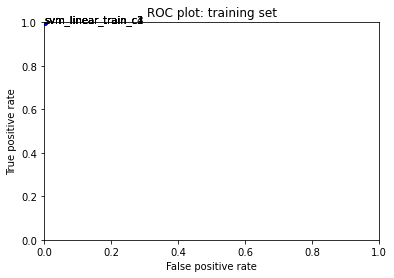

In [23]:
from sklearn import svm

svm_linear = svm.LinearSVC(loss='hinge')
svm_linear.fit(X_train, y_train)

svm_linear_c1 = svm.LinearSVC(loss='hinge', C=.1)
svm_linear_c1.fit(X_train, y_train)

svm_linear_c2 = svm.LinearSVC(loss='hinge', C=.075)
svm_linear_c2.fit(X_train, y_train)

svm_linear_c3 = svm.LinearSVC(loss='hinge', C=2)
svm_linear_c3.fit(X_train, y_train)

svm_linear_c4 = svm.LinearSVC(loss='hinge', C=10000000)
svm_linear_c4.fit(X_train, y_train)

svm_linear_performance_train = BinaryClassificationPerformance(svm_linear.predict(X_train), y_train, 'svm_linear_train')
svm_linear_performance_train.compute_measures()
print(svm_linear_performance_train.performance_measures)

svm_linear_performance_train_c1 = BinaryClassificationPerformance(svm_linear_c1.predict(X_train), y_train, 'svm_linear_train_c1')
svm_linear_performance_train_c1.compute_measures()
print(svm_linear_performance_train_c1.performance_measures)

svm_linear_performance_train_c2 = BinaryClassificationPerformance(svm_linear_c2.predict(X_train), y_train, 'svm_linear_train_c2')
svm_linear_performance_train_c2.compute_measures()
print(svm_linear_performance_train_c2.performance_measures)

svm_linear_performance_train_c3 = BinaryClassificationPerformance(svm_linear_c3.predict(X_train), y_train, 'svm_linear_train_c3')
svm_linear_performance_train_c3.compute_measures()
print(svm_linear_performance_train_c3.performance_measures)

svm_linear_performance_train_c4 = BinaryClassificationPerformance(svm_linear_c4.predict(X_train), y_train, 'svm_linear_train_c4')
svm_linear_performance_train_c4.compute_measures()
print(svm_linear_performance_train_c4.performance_measures)

#graphs for C changes to svm models on training set data
graphs = [svm_linear_performance_train, svm_linear_performance_train_c1, svm_linear_performance_train_c2, svm_linear_performance_train_c3, svm_linear_performance_train_c4]

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### MODEL: logistic regression

In [9]:
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log')
# lgs.fit(X_train, y_train)

# lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
# lgs_performance_train.compute_measures()
# print(lgs_performance_train.performance_measures)

### MODEL: Naive Bayes

In [10]:
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X_train, y_train)

# nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
# nbs_performance_train.compute_measures()
# print(nbs_performance_train.performance_measures)

### MODEL: Perceptron

In [11]:
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X_train, y_train)

# prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
# prc_performance_train.compute_measures()
# print(prc_performance_train.performance_measures)

### MODEL: Ridge Regression Classifier

In [12]:
# from sklearn import linear_model

# rdg_original = linear_model.RidgeClassifier()
# rdg_original.fit(X_train, y_train)

# rdg_alpha1 = linear_model.RidgeClassifier(alpha=10000)
# rdg_alpha1.fit(X_train, y_train)

# rdg_alpha2 = linear_model.RidgeClassifier(alpha=50000)
# rdg_alpha2.fit(X_train, y_train)

# rdg_alpha3 = linear_model.RidgeClassifier(alpha=500000)
# rdg_alpha3.fit(X_train, y_train)

# rdg_alpha4 = linear_model.RidgeClassifier(alpha=1000000)
# rdg_alpha4.fit(X_train, y_train)

# rdg_performance_train_original = BinaryClassificationPerformance(rdg_original.predict(X_train), y_train, 'rdg_original_train')
# rdg_performance_train_original.compute_measures()
# print("original") 
# print(rdg_performance_train_original.performance_measures)

# rdg_performance_train_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_train), y_train, 'rdg_alpha1_train')
# rdg_performance_train_alpha1.compute_measures()
# print("alpha1")
# print(rdg_performance_train_alpha1.performance_measures)

# rdg_performance_train_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_train), y_train, 'rdg_alpha2_train')
# rdg_performance_train_alpha2.compute_measures()
# print("alpha2")
# print(rdg_performance_train_alpha2.performance_measures)

# rdg_performance_train_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_train), y_train, 'rdg_alpha3_train')
# rdg_performance_train_alpha3.compute_measures()
# print("alpha3")
# print(rdg_performance_train_alpha3.performance_measures)

# rdg_performance_train_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_train), y_train, 'rdg_alpha4_train')
# rdg_performance_train_alpha4.compute_measures()
# print("alpha4")
# print(rdg_performance_train_alpha4.performance_measures)

# #graphs for alpha changes to ridge class on training set data
# graphs = [rdg_performance_train_original, rdg_performance_train_alpha1, rdg_performance_train_alpha2, rdg_performance_train_alpha3, rdg_performance_train_alpha4]

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: training set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

### MODEL: Random Forest Classifier

In [13]:
# from sklearn.ensemble import RandomForestClassifier
# rdf = RandomForestClassifier(max_depth=2, random_state=0)
# rdf.fit(X_train, y_train)

# rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
# rdf_performance_train.compute_measures()
# print(rdf_performance_train.performance_measures)

### ROC plot to compare performance of various models and fits

In [14]:
# fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train_original, rdf_performance_train]

# for fit in fits:
#     plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
#     plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: training set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

### looking at reviews based on their classification

Let's say we decide that Ordinary Least Squares (OLS) Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [15]:
# ols_predictions = ols.predict(X_train)

### let's look at some false positives:

In [16]:
# false positives

# print("Examples of false positives:")

# import random, time

# for i in range(0, len(ols_predictions)):
#     if (ols_predictions[i] == 1):
#         if (X_raw_train.iloc[i]['sentiment'] == 0):
#             if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
#                 print(i)
#                 print(X_raw_train.iloc[i]['review'])
#                 print('* * * * * * * * * ')


---

# <span style="color:red">WARNING: Don't look at test set performance too much!</span>

---

The following cells show performance on your test set. Do not look at this too often! 

# Look at performance on the test set

### MODEL: ordinary least squares

In [17]:
# ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
# ols_performance_test.compute_measures()
# print(ols_performance_test.performance_measures)

### MODEL: SVM, linear

In [9]:
svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print(svm_performance_test.performance_measures)

{'Pos': 2498, 'Neg': 2502, 'TP': 2116, 'TN': 2093, 'FP': 409, 'FN': 382, 'Accuracy': 0.8418, 'Precision': 0.838019801980198, 'Recall': 0.8470776621297038, 'desc': 'svm_test'}


## MODEL: svm.SVC

In [ ]:
# svm_performance_test_original = BinaryClassificationPerformance(svm_original.predict(X_test), y_test, 'svm_test_original')
# svm_performance_test_original.compute_measures()
# print(svm_performance_test_original.performance_measures)

# svm_performance_test_c1 = BinaryClassificationPerformance(svm_c1.predict(X_test), y_test, 'svm_test_c1')
# svm_performance_test_c1.compute_measures()
# print(svm_performance_test_c1.performance_measures)

# svm_performance_test_c2 = BinaryClassificationPerformance(svm_c2.predict(X_test), y_test, 'svm_test_c2')
# svm_performance_test_c2.compute_measures()
# print(svm_performance_test_c2.performance_measures)

# svm_performance_test_c3 = BinaryClassificationPerformance(svm_c3.predict(X_test), y_test, 'svm_test_c3')
# svm_performance_test_c3.compute_measures()
# print(svm_performance_test_c3.performance_measures)

# svm_performance_test_c4 = BinaryClassificationPerformance(svm_c4.predict(X_test), y_test, 'svm_test_c4')
# svm_performance_test_c4.compute_measures()
# print(svm_performance_test_c4.performance_measures)

# #graphs for C changes to svm models on training set data
# graphs = [svm_performance_test_original, svm_performance_test_c1, svm_performance_test_c2, svm_performance_test_c3, svm_performance_test_c4]

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: training set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

 ## MODEL: svm.LinearSVC 

{'Pos': 2498, 'Neg': 2502, 'TP': 2274, 'TN': 2248, 'FP': 254, 'FN': 224, 'Accuracy': 0.9044, 'Precision': 0.8995253164556962, 'Recall': 0.910328262610088, 'desc': 'svm_linear_test'}
{'Pos': 2498, 'Neg': 2502, 'TP': 2274, 'TN': 2248, 'FP': 254, 'FN': 224, 'Accuracy': 0.9044, 'Precision': 0.8995253164556962, 'Recall': 0.910328262610088, 'desc': 'svm_linear_test_c1'}
{'Pos': 2498, 'Neg': 2502, 'TP': 2274, 'TN': 2248, 'FP': 254, 'FN': 224, 'Accuracy': 0.9044, 'Precision': 0.8995253164556962, 'Recall': 0.910328262610088, 'desc': 'svm_linear_test_c2'}
{'Pos': 2498, 'Neg': 2502, 'TP': 2274, 'TN': 2248, 'FP': 254, 'FN': 224, 'Accuracy': 0.9044, 'Precision': 0.8995253164556962, 'Recall': 0.910328262610088, 'desc': 'svm_linear_test_c3'}
{'Pos': 2498, 'Neg': 2502, 'TP': 2274, 'TN': 2248, 'FP': 254, 'FN': 224, 'Accuracy': 0.9044, 'Precision': 0.8995253164556962, 'Recall': 0.910328262610088, 'desc': 'svm_linear_test_c4'}


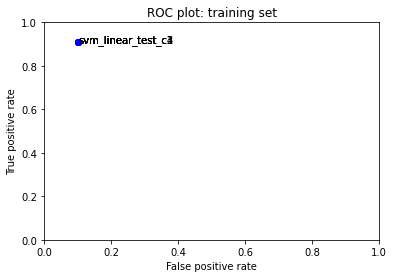

In [24]:
svm_linear_performance_test = BinaryClassificationPerformance(svm_linear.predict(X_test), y_test, 'svm_linear_test')
svm_linear_performance_test.compute_measures()
print(svm_linear_performance_test.performance_measures)

svm_linear_performance_test_c1 = BinaryClassificationPerformance(svm_linear_c1.predict(X_test), y_test, 'svm_linear_test_c1')
svm_linear_performance_test_c1.compute_measures()
print(svm_linear_performance_test_c1.performance_measures)

svm_linear_performance_test_c2 = BinaryClassificationPerformance(svm_linear_c2.predict(X_test), y_test, 'svm_linear_test_c2')
svm_linear_performance_test_c2.compute_measures()
print(svm_linear_performance_test_c2.performance_measures)

svm_linear_performance_test_c3 = BinaryClassificationPerformance(svm_linear_c3.predict(X_test), y_test, 'svm_linear_test_c3')
svm_linear_performance_test_c3.compute_measures()
print(svm_linear_performance_test_c3.performance_measures)

svm_linear_performance_test_c4 = BinaryClassificationPerformance(svm_linear_c4.predict(X_test), y_test, 'svm_linear_test_c4')
svm_linear_performance_test_c4.compute_measures()
print(svm_linear_performance_test_c4.performance_measures)

#graphs for C changes to svm models on training set data
graphs = [svm_linear_performance_test, svm_linear_performance_test_c1, svm_linear_performance_test_c2, svm_linear_performance_test_c3, svm_linear_performance_test_c4]

for graph in graphs:
    plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
    plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
             graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: training set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### MODEL: logistic regression

In [ ]:
# lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
# lgs_performance_test.compute_measures()
# print(lgs_performance_test.performance_measures)

### MODEL: Naive Bayes

In [ ]:
# nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
# nbs_performance_test.compute_measures()
# print(nbs_performance_test.performance_measures)

### MODEL: Perceptron

In [ ]:
# prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
# prc_performance_test.compute_measures()
# print(prc_performance_test.performance_measures)

### MODEL: Ridge Regression Classifier

In [ ]:
# rdg_performance_test_original = BinaryClassificationPerformance(rdg_original.predict(X_test), y_test, 'rdg_original_test')
# rdg_performance_test_original.compute_measures()
# print("original")
# print(rdg_performance_test_original.performance_measures)

# rdg_performance_test_alpha1 = BinaryClassificationPerformance(rdg_alpha1.predict(X_test), y_test, 'rdg_alpha1_test')
# rdg_performance_test_alpha1.compute_measures()
# print("alpha1")
# print(rdg_performance_test_alpha1.performance_measures)

# rdg_performance_test_alpha2 = BinaryClassificationPerformance(rdg_alpha2.predict(X_test), y_test, 'rdg_alpha2_test')
# rdg_performance_test_alpha2.compute_measures()
# print("alpha2")
# print(rdg_performance_test_alpha2.performance_measures)

# rdg_performance_test_alpha3 = BinaryClassificationPerformance(rdg_alpha3.predict(X_test), y_test, 'rdg_alpha3_test')
# rdg_performance_test_alpha3.compute_measures()
# print("alpha3")
# print(rdg_performance_test_alpha3.performance_measures)

# rdg_performance_test_alpha4 = BinaryClassificationPerformance(rdg_alpha4.predict(X_test), y_test, 'rdg_alpha4_test')
# rdg_performance_test_alpha4.compute_measures()
# print("alpha4")
# print(rdg_performance_test_alpha4.performance_measures)

# # graphs for alpha changes to ridge class on test set data
# graphs = [rdg_performance_test_original, rdg_performance_test_alpha1, rdg_performance_test_alpha2, rdg_performance_test_alpha3, rdg_performance_test_alpha4]

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: test set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

# for graph in graphs:
#     plt.plot(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], 'bo')
#     plt.text(graph.performance_measures['FP'] / graph.performance_measures['Neg'], 
#              graph.performance_measures['TP'] / graph.performance_measures['Pos'], graph.desc)
# plt.axis([.1, .13, .85, .95])
# plt.title('ROC plot: test set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

### MODEL: Random Forest Classifier

In [ ]:
# rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
# rdf_performance_test.compute_measures()
# print(rdf_performance_test.performance_measures)

### ROC plot to compare performance of various models and fits

In [ ]:
# fits = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test_original, rdf_performance_test]

# for fit in fits:
#     plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
#     plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
#              fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
# plt.axis([0, 1, 0, 1])
# plt.title('ROC plot: test set')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.show()

---

# <span style="color:red">SUBMISSION</span>

---

In [ ]:
# # read in test data for submission
# # CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
# raw_data, X_test_submission = process_raw_data(fn='/Users/meeraramesh/Desktop/School/git/ml/final_assignment_1/moviereviews_test.tsv', my_random_seed=13, test=True)
# print("Number of rows in the submission test set (should be 25,000): ")

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [ ]:
# # store the id from the raw data
# my_submission = pd.DataFrame(raw_data["id"])
# # concatenate predictions to the id
# my_submission["prediction"] = rdg_alpha3.predict(X_test_submission)
# # look at the proportion of positive predictions
# print(my_submission['prediction'].mean())

In [ ]:
# raw_data.head()

In [ ]:
# my_submission.head()

In [ ]:
# my_submission.shape

In [ ]:
# # export submission file as pdf
# # CHANGE FILE PATH: 
# my_submission.to_csv('/Users/meeraramesh/Desktop/moviereviews_submission.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation